<a href="https://colab.research.google.com/github/DenisAksyan/1/blob/main/%D0%90%D0%BA%D1%81%D0%B5%D0%BD%D0%BE%D0%B2%D1%81%D0%BA%D0%B8%D0%B9_%D0%94_%D0%90_21_1_2_%D0%BA%D1%83%D1%80%D1%81_%D0%BC%D0%B0%D0%B3_%223_%D0%9B%D0%B0%D0%B1%D0%B0_%D0%9C%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C_%D0%BF%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F_SARIMAx%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Временные ряды

### Анализ временных рядов

#### Импорт данных и работа в библиотеке Pandas

In [133]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [134]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Глобальные температурные аномалии — это отклонения средних температур воздуха на Земле от долгосрочных норм, обычно рассчитанных на основе данных за несколько десятилетий.

Анализ данных о температурных аномалиях помогает в моделировании будущих климатических условий и подготовке к возможным экстремальным явлениям, таким как засухи, наводнения и ураганы.

Ссылка на датесет [(ссылка)](https://www.kaggle.com/datasets/shuthdar/global-surface-temperature-anomalies-time-series/data)

In [135]:
# импортируем файл с данными
shares = pd.read_csv("/content/drive/MyDrive/temp_anomaly.csv")
shares.head()

,Year,AnomalyBoth,AnomalyLand,AnomalyOcean
0,1850,-0.17,-0.42,-0.06
1,1851,-0.09,-0.29,0.00
2,1852,-0.10,-0.39,0.03
3,1853,-0.12,-0.40,0.01
4,1854,-0.11,-0.32,-0.02


Оставил только колонку с информацией об аномалиях на земле

In [136]:
shares = shares.drop(columns=['AnomalyOcean'])
shares = shares.drop(columns=['AnomalyBoth'])

In [137]:
shares.head()

,Year,AnomalyLand
0,1850,-0.42
1,1851,-0.29
2,1852,-0.39
3,1853,-0.40
4,1854,-0.32


In [138]:
# превратим дату в индекс и сделаем изменение постоянным
shares.set_index('Year', inplace = True)
shares.head()

,AnomalyLand
Year,
1850,-0.42
1851,-0.29
1852,-0.39
1853,-0.40
1854,-0.32


In [9]:
shares.index

Index([1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859,
       ...
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
      dtype='int64', name='Year', length=174)

Немного изменил код, поскольку изначальный вариант у меня не работал

In [139]:
years = range(1850, 2024)

In [140]:
# превратим дату (наш индекс) в объект datetime
shares.index = pd.to_datetime([f"{year}-01-01" for year in years])

# посмотрим на первые пять дат и на тип данных
shares.index[:5]

DatetimeIndex(['1850-01-01', '1851-01-01', '1852-01-01', '1853-01-01',
               '1854-01-01'],
              dtype='datetime64[ns]', freq=None)

In [141]:
# сделаем срез по дате
shares['2000-01-01':'2024-01-01']

,AnomalyLand
2000-01-01,0.65
2001-01-01,0.79
2002-01-01,0.94
2003-01-01,0.92
2004-01-01,0.68
2005-01-01,1.18
2006-01-01,1.06
2007-01-01,1.22
2008-01-01,0.90
2009-01-01,0.96


#### Изменение шага временного ряда, сдвиг и скользящее среднее

In [142]:
shares.resample(rule = 'YS').mean().head()

,AnomalyLand
1850-01-01,-0.42
1851-01-01,-0.29
1852-01-01,-0.39
1853-01-01,-0.40
1854-01-01,-0.32


In [143]:
# произведем сдвиг на два периода
shares.shift(2, axis = 0).head()

,AnomalyLand
1850-01-01,NaN
1851-01-01,NaN
1852-01-01,-0.42
1853-01-01,-0.29
1854-01-01,-0.39


In [144]:
# рассчитаем скользящее среднее
shares.rolling(window = 3).mean().head()

,AnomalyLand
1850-01-01,NaN
1851-01-01,NaN
1852-01-01,-0.366667
1853-01-01,-0.360000
1854-01-01,-0.370000


#### Построение графиков

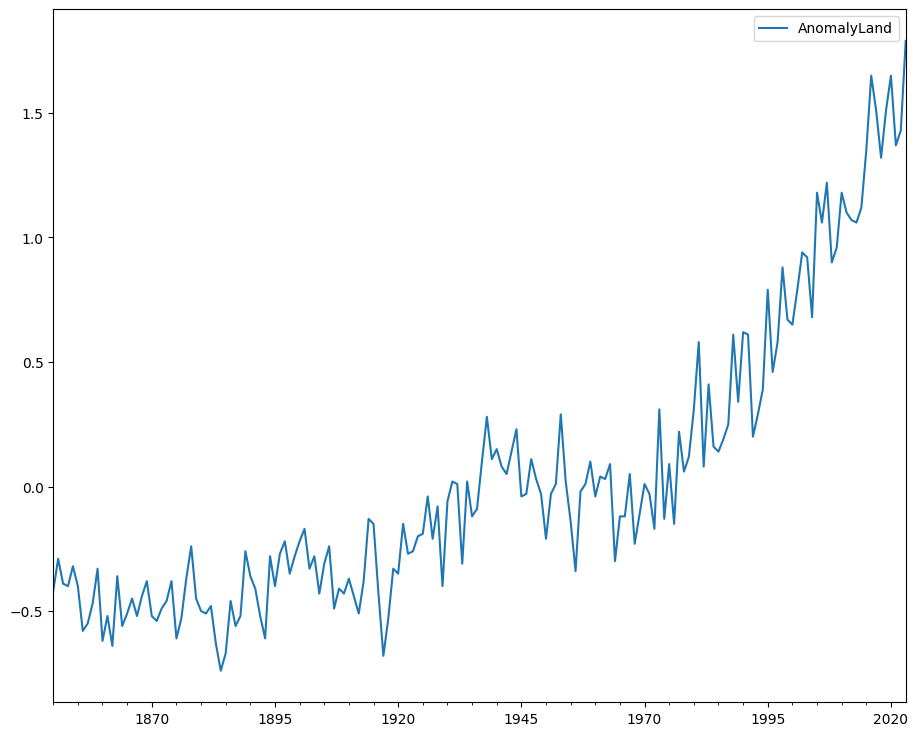

In [145]:
# построим простой график изменения данных во времени прямо в библиотеке Pandas
shares.plot();

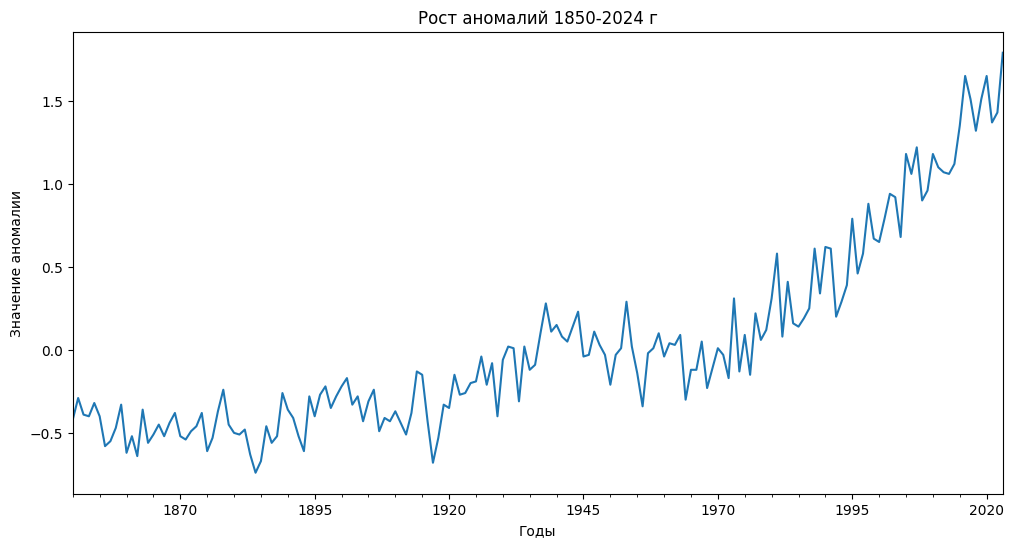

In [146]:
# изменим размер графика, уберем легенду и добавим подписи
ax = shares.plot(figsize = (12,6), legend = None)
ax.set(title = 'Рост аномалий 1850-2024 г', xlabel = 'Годы', ylabel = 'Значение аномалии');

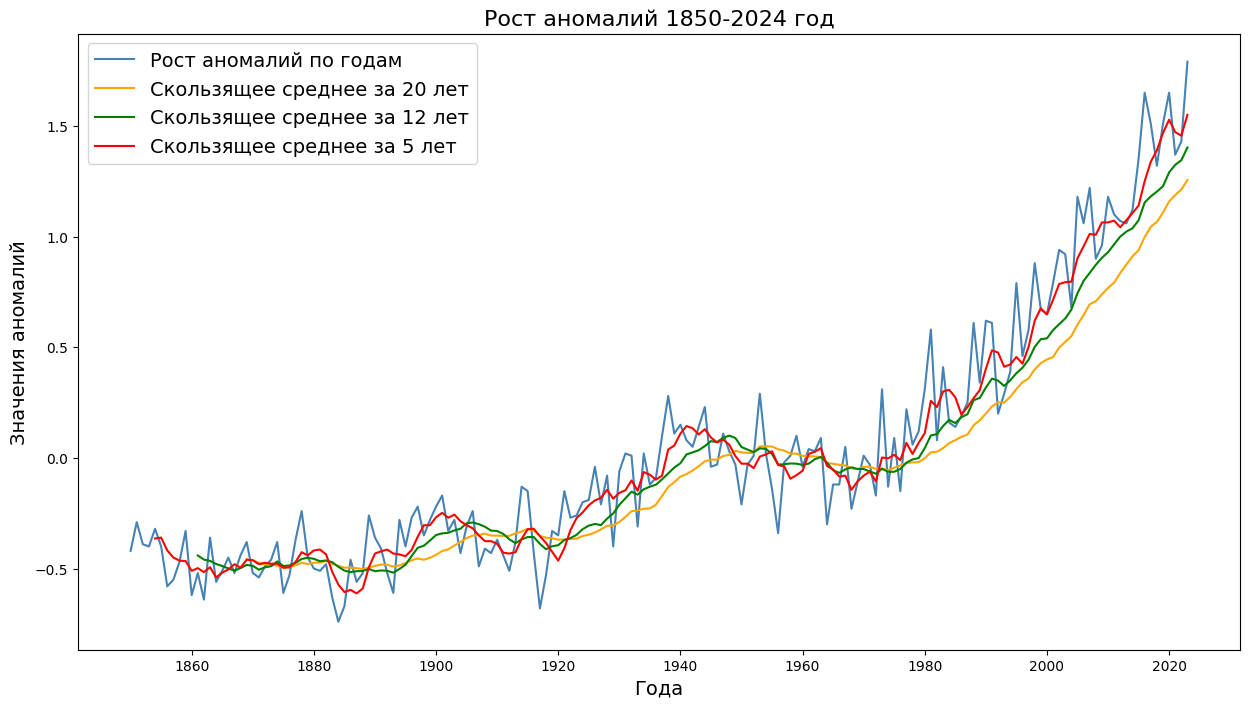

In [147]:
# теперь воспользуемся библиотекой matplotlib для построения сразу двух графиков

# зададим размер графика
plt.figure(figsize = (15,8))

# поочередно зададим кривые (перевозки и скользящее среднее) с подписями и цветом
plt.plot(shares, label = 'Рост аномалий по годам', color = 'steelblue')
plt.plot(shares.rolling(window = 20).mean(), label = 'Скользящее среднее за 20 лет', color = 'orange')
plt.plot(shares.rolling(window = 12).mean(), label = 'Скользящее среднее за 12 лет', color = 'green')
plt.plot(shares.rolling(window = 5).mean(), label = 'Скользящее среднее за 5 лет', color = 'red')
# добавим легенду, ее положение на графике и размер шрифта
plt.legend(title = '', loc = 'upper left', fontsize = 14)

# добавим подписи к осям и заголовки
plt.xlabel('Года', fontsize = 14)
plt.ylabel('Значения аномалий', fontsize = 14)
plt.title('Рост аномалий 1850-2024 год', fontsize = 16)

# выведем обе кривые на одном графике
plt.show()

#### Разложение временного ряда на компоненты

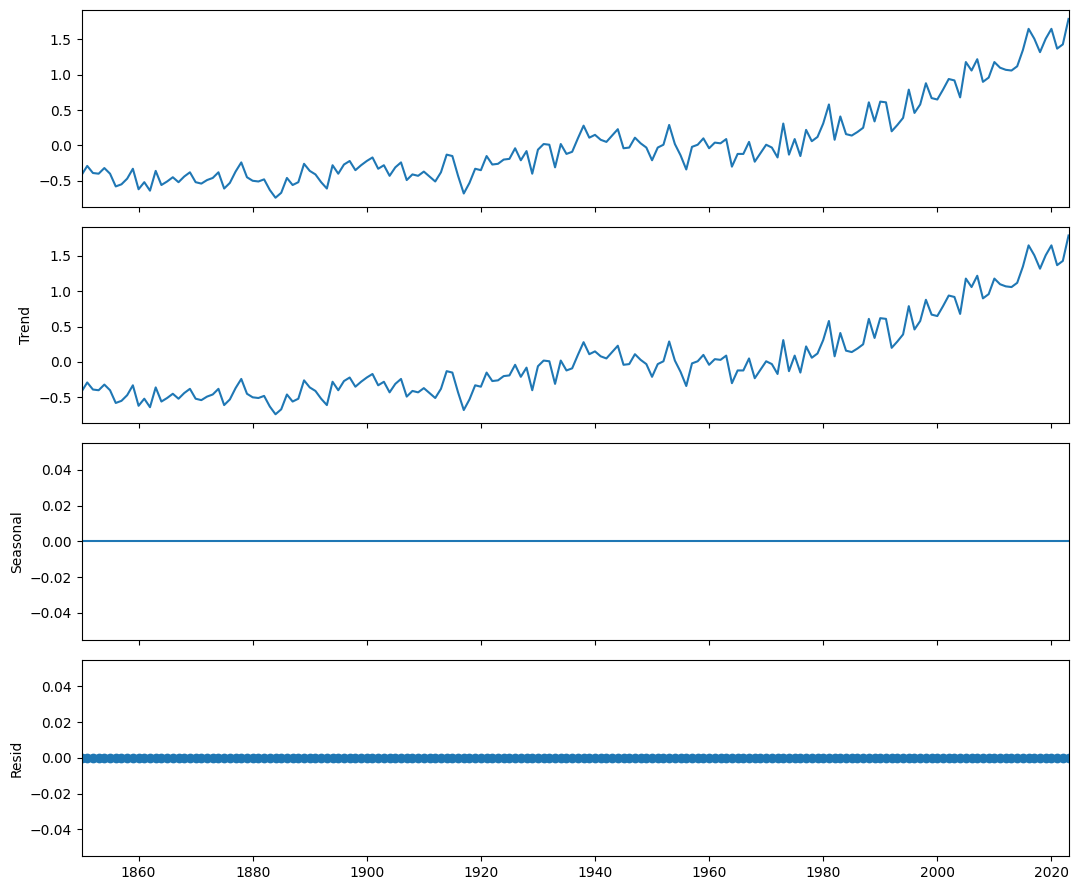

In [148]:
# импортируем функцию seasonal_decompose из statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

# задаем размер графика
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

# применяем функцию к данным о котировках МТС
decompose = seasonal_decompose(shares)
decompose.plot()

plt.show()

#### Проверка временного ряда на стационарность

In [149]:
# проведем тест Дики-Фуллера (Dickey-Fuller test)

# импортируем необходимую функцию
from statsmodels.tsa.stattools import adfuller

# передадим ей столбец с данными об акциях МТС и поместим результат в adf_test
adf_test = adfuller(shares['AnomalyLand'])

# выведем p-value
print('p-value = ' + str(adf_test[1]))

p-value = 0.9990847884799255


Стационарность стремится к 1 следовательно, присутствует или тренд или сезонность

#### Автокорреляция

In [98]:
from statsmodels.graphics.tsaplots import plot_acf

Корреляция большая но уменьшается равномерно, следовательно сезонность отсутствует а тренд присутствует

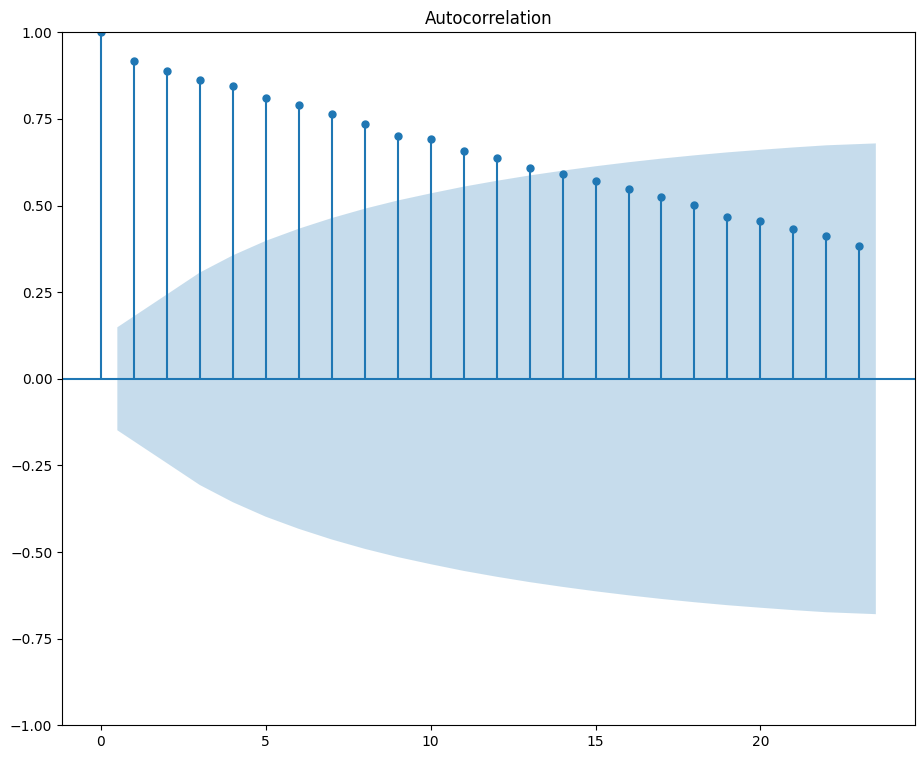

In [99]:
plot_acf(shares)
plt.show()

### Моделирование и построение прогноза

### Модель Sarimax

In [272]:
# разобьём данные на обучающую и тестовую выборки

# обучающая выборка
train = shares['1970-12':'2011-12']

# тестовая выборка начнется
test = shares['2010-12':]

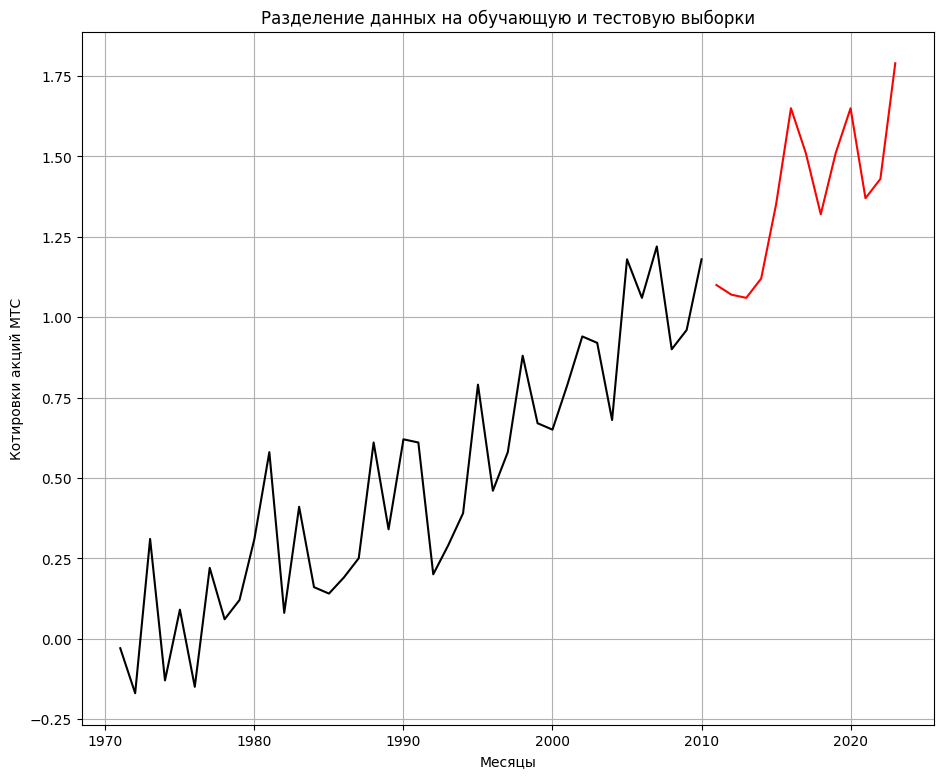

In [273]:
# выведем эти данные на графике
plt.plot(train, color = "black")
plt.plot(test, color = "red")

# заголовок и подписи к осям
plt.title('Разделение данных на обучающую и тестовую выборки')
plt.ylabel('Котировки акций МТС')
plt.xlabel('Месяцы')

# добавим сетку
plt.grid()

plt.show()

In [274]:
# принудительно отключим предупреждения системы
import warnings
warnings.simplefilter(action = 'ignore', category = Warning)

# обучим модель с соответствующими параметрами, SARIMAX(1, 1, 0)x(1, 1, 1, 24)

# импортируем класс модели
from statsmodels.tsa.statespace.sarimax import SARIMAX

# создадим объект этой модели
model = SARIMAX(train,
                order = (1, 1, 0),
                seasonal_order = (1, 1, 1, 24))

# применим метод fit
result = model.fit()

In [275]:
# мы можем посмотреть результат с помощью метода summary() Чем ближе значение P>|z| к нулю, тем выше значимость
print(result.summary())

                                      SARIMAX Results                                       
Dep. Variable:                          AnomalyLand   No. Observations:                   40
Model:             SARIMAX(1, 1, 0)x(1, 1, [1], 24)   Log Likelihood                  -2.139
Date:                              Tue, 28 Jan 2025   AIC                             12.278
Time:                                      14:50:09   BIC                             15.110
Sample:                                  01-01-1971   HQIC                            12.248
                                       - 01-01-2010                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4904      0.291     -1.688      0.091      -1.060       0.079
ar.S.L24   -6.759e-

In [276]:
# тестовый прогнозный период начнется с конца обучающего периода
start = len(train)

# и закончится в конце тестового
end = len(train) + len(test) - 1

# применим метод predict
predictions = result.predict(start, end)
predictions

,predicted_mean
2011-01-01,1.156625
2012-01-01,1.557516
2013-01-01,1.267461
2014-01-01,1.557297
2015-01-01,1.542473
2016-01-01,1.134839
2017-01-01,1.223677
2018-01-01,1.324249
2019-01-01,1.723964
2020-01-01,1.394114


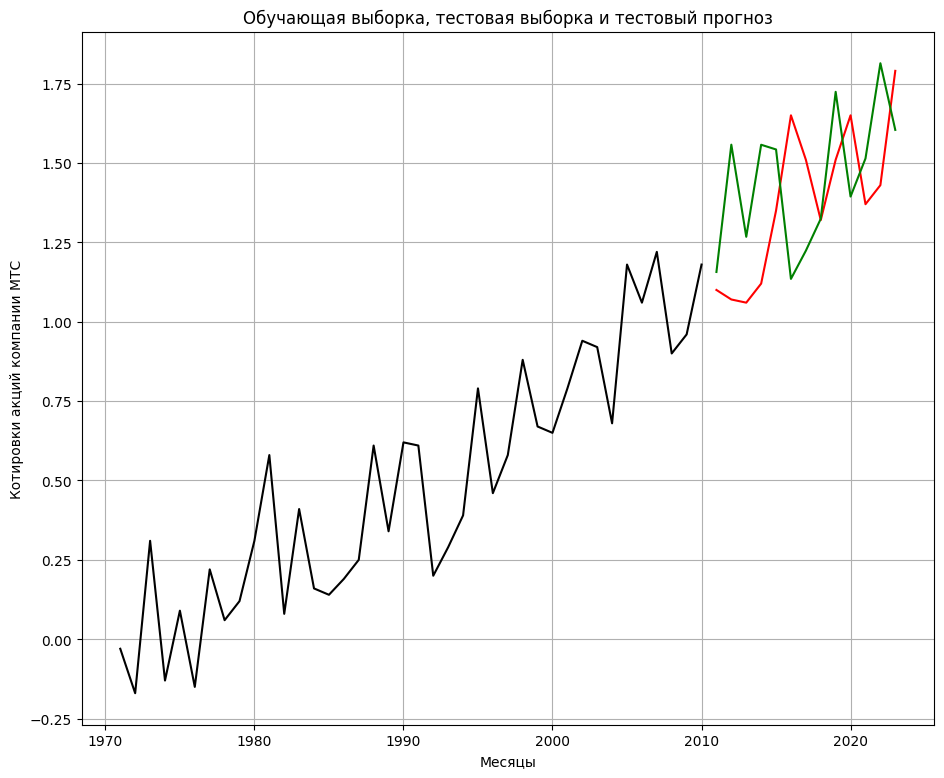

In [277]:
# выведем три кривые (обучающая, тестовая выборка и тестовый прогноз)
plt.plot(train, color = 'black')
plt.plot(test, color = 'red')
plt.plot(predictions, color = 'green')

# заголовок и подписи к осям
plt.title('Обучающая выборка, тестовая выборка и тестовый прогноз')
plt.ylabel('Котировки акций компании МТС')
plt.xlabel('Месяцы')

# добавим сетку
plt.grid()

plt.show()

In [278]:
# импортируем метрику
from sklearn.metrics import mean_squared_error

# рассчитаем MSE
print(mean_squared_error(test, predictions))

# и RMSE
print(np.sqrt(mean_squared_error(test, predictions)))

0.0902818911822603
0.30046945132951586


In [279]:
shares.mean()

,0
AnomalyLand,0.027299


Далее попытался сделать прогноз на будущее

In [280]:
# прогнозный период начнется с конца имеющихся данных
start = len(train + test)

# и закончится 20 лет спустя
end = (len(train + test) - 1) + 21

# теперь построим прогноз на три года вперед
forecast = result.predict(start, end)

# посмотрим на 20 лет вперед
forecast[-40:20]

,predicted_mean
2024-01-01,1.584060
2025-01-01,1.724072
2026-01-01,1.874052
2027-01-01,1.854057
2028-01-01,1.614087
2029-01-01,2.114071
2030-01-01,1.994045
2031-01-01,2.154056
2032-01-01,1.834061
2033-01-01,1.894056


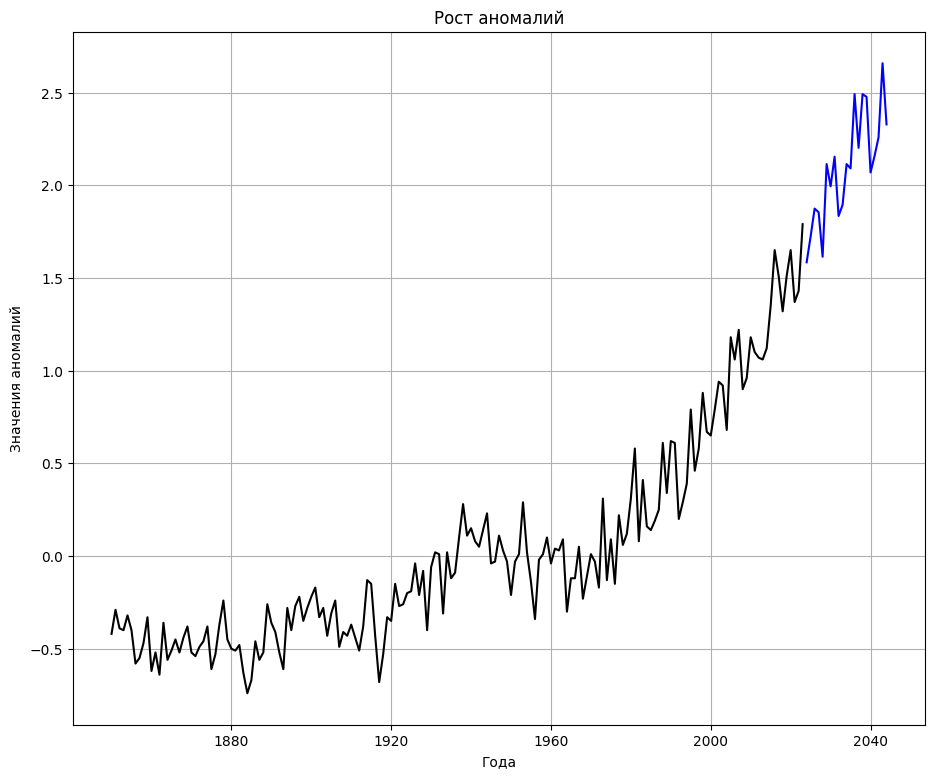

In [281]:
# выведем две кривые (фактические данные и прогноз на будущее)
plt.plot(shares, color = 'black')
plt.plot(forecast, color = 'blue')

# заголовок и подписи к осям
plt.title('Рост аномалий')
plt.ylabel('Значения аномалий')
plt.xlabel('Года')

# добавим сетку
plt.grid()

plt.show()

In [282]:
# разобьём данные на обучающую и тестовую выборки

# обучающая выборка
train = shares['1970-12':'2010-12']

# тестовая выборка начнется
test = shares['2010-12':]

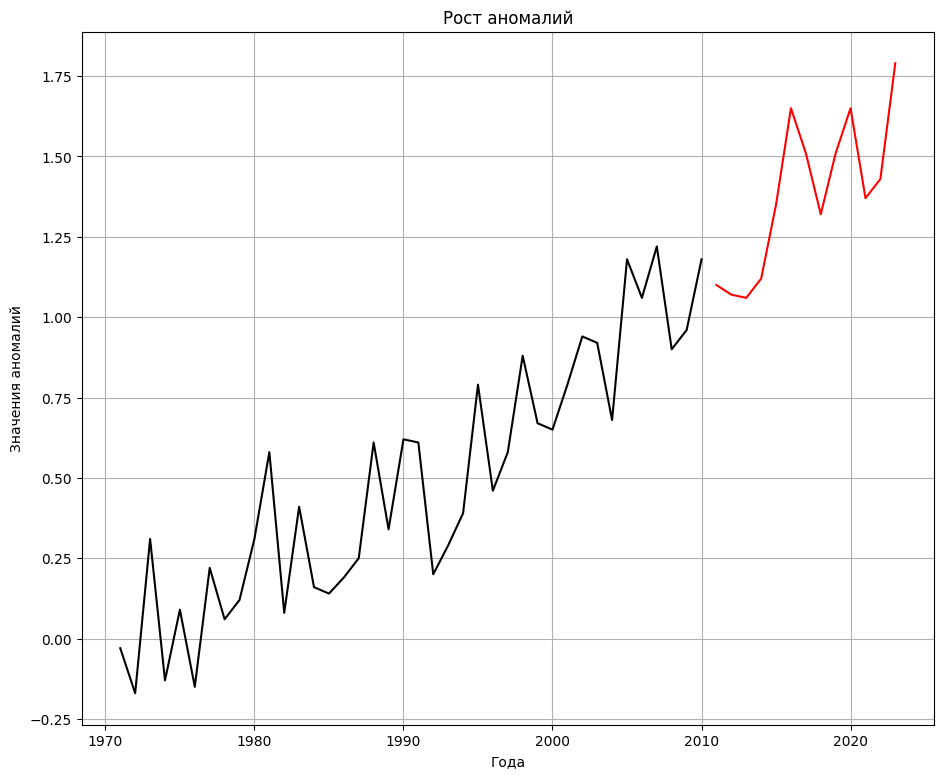

In [284]:
# выведем эти данные на графике
plt.plot(train, color = "black")
plt.plot(test, color = "red")

# заголовок и подписи к осям
plt.title('Рост аномалий')
plt.ylabel('Значения аномалий')
plt.xlabel('Года')

# добавим сетку
plt.grid()

plt.show()

In [285]:
# принудительно отключим предупреждения системы
import warnings
warnings.simplefilter(action = 'ignore', category = Warning)

# обучим модель с соответствующими параметрами, SARIMAX(1, 1, 0)x(1, 1, 1, 12)

# импортируем класс модели
from statsmodels.tsa.statespace.sarimax import SARIMAX

# создадим объект этой модели
model = SARIMAX(train,
                order = (3, 0, 0),
                seasonal_order = (0, 1, 0, 12))

# применим метод fit
result = model.fit()

In [286]:
# тестовый прогнозный период начнется с конца обучающего периода
start = len(train)

# и закончится в конце тестового
end = len(train) + len(test) - 1

# применим метод predict
predictions = result.predict(start, end)
predictions

,predicted_mean
2011-01-01,0.956761
2012-01-01,0.907112
2013-01-01,1.013611
2014-01-01,1.141238
2015-01-01,1.099919
2016-01-01,0.839617
2017-01-01,1.322421
2018-01-01,1.187044
2019-01-01,1.333135
2020-01-01,1.000839


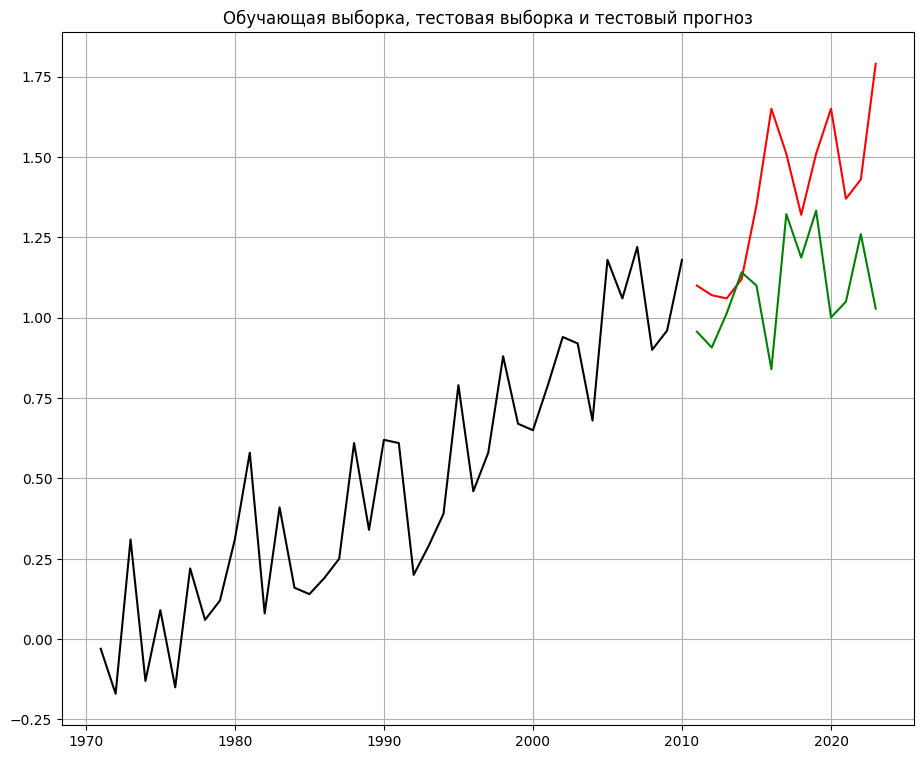

In [287]:
# выведем три кривые (обучающая, тестовая выборка и тестовый прогноз)
plt.plot(train, color = 'black')
plt.plot(test, color = 'red')
plt.plot(predictions, color = 'green')

# заголовок и подписи к осям
plt.title('Обучающая выборка, тестовая выборка и тестовый прогноз')

# добавим сетку
plt.grid()

plt.show()

In [288]:
# импортируем метрику
from sklearn.metrics import mean_squared_error

# рассчитаем MSE
print(mean_squared_error(test, predictions))

# и RMSE
print(np.sqrt(mean_squared_error(test, predictions)))

0.1527863493340709
0.3908789446031481


### Дополнительный материал

In [289]:
# установим pmdarima
!pip install pmdarima

In [251]:
!pip install statsmodels

In [290]:
# импортируем функцию для автоматического подбора параметров модели ARIMA
from pmdarima import auto_arima


# "погасим" предупреждения
import warnings
warnings.filterwarnings("ignore")

# настроим поиск параметров на обучающей выборке
parameter_search = auto_arima(train, start_p = 1, start_q = 1, max_p = 3, max_q = 3, m = 24, start_P = 0, seasonal = True,
                         d = None, D = 1, trace = True, error_action ='ignore', suppress_warnings = True,  stepwise = True)           #

# выведем результат
print(parameter_search.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[24] intercept   : AIC=2.979, Time=7.01 sec
 ARIMA(0,0,0)(0,1,0)[24] intercept   : AIC=-1.133, Time=0.13 sec
 ARIMA(1,0,0)(1,1,0)[24] intercept   : AIC=2.179, Time=1.42 sec
 ARIMA(0,0,1)(0,1,1)[24] intercept   : AIC=1.725, Time=1.38 sec
 ARIMA(0,0,0)(0,1,0)[24]             : AIC=38.537, Time=0.07 sec
 ARIMA(0,0,0)(1,1,0)[24] intercept   : AIC=0.867, Time=3.05 sec
 ARIMA(0,0,0)(0,1,1)[24] intercept   : AIC=0.867, Time=3.16 sec
 ARIMA(0,0,0)(1,1,1)[24] intercept   : AIC=2.867, Time=1.39 sec
 ARIMA(1,0,0)(0,1,0)[24] intercept   : AIC=0.179, Time=0.16 sec
 ARIMA(0,0,1)(0,1,0)[24] intercept   : AIC=-0.275, Time=0.91 sec
 ARIMA(1,0,1)(0,1,0)[24] intercept   : AIC=0.982, Time=3.10 sec

Best model:  ARIMA(0,0,0)(0,1,0)[24] intercept
Total fit time: 21.860 seconds
                                SARIMAX Results                                 
Dep. Variable:                        y   No. Observations:                   40
Model:   

Лучшие параметры: ARIMA(0,0,0)(0,1,0)[24]

In [291]:
# создадим объект этой модели
model = SARIMAX(train,
                order = (0, 0, 0),
                seasonal_order = (0, 1, 0, 24))

# применим метод fit
result = model.fit()

In [292]:
# тестовый прогнозный период начнется с конца обучающего периода
start = len(train)

# и закончится в конце тестового
end = len(train) + len(test) - 1

# применим метод predict
predictions = result.predict(start, end)
predictions

,predicted_mean
2011-01-01,0.25
2012-01-01,0.61
2013-01-01,0.34
2014-01-01,0.62
2015-01-01,0.61
2016-01-01,0.20
2017-01-01,0.29
2018-01-01,0.39
2019-01-01,0.79
2020-01-01,0.46


Окончательный прогноз на будущее

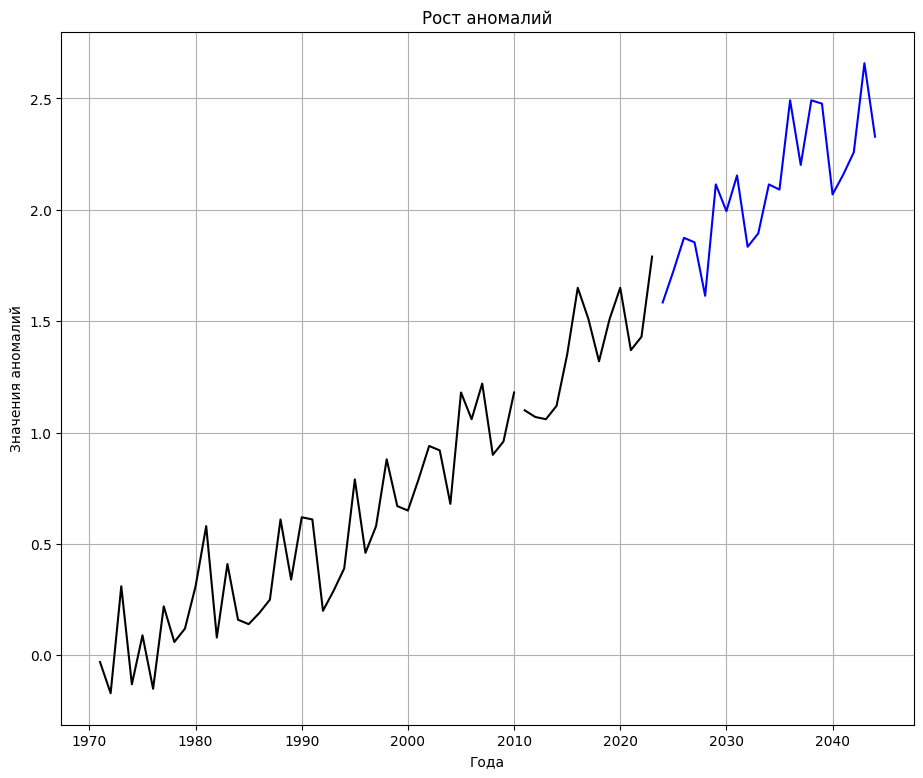

In [293]:
# выведем две кривые (фактические данные и прогноз на будущее)
plt.plot(train, color = 'black')
plt.plot(test, color = 'black')
plt.plot(forecast, color = 'blue')

# заголовок и подписи к осям
plt.title('Рост аномалий')
plt.ylabel('Значения аномалий')
plt.xlabel('Года')

# добавим сетку
plt.grid()

plt.show()